# Sleep Health and Lifestyle Data Analysis

## Objective

The purpose of this project is to perform a comprehensive exploratory data analysis (EDA) on a Sleep Health and Lifestyle dataset. The goals are to:

- Understand the distribution and characteristics of key sleep health metrics such as sleep duration, sleep quality, and presence of sleep disorders.
- Explore how lifestyle factors like physical activity, daily steps, stress level, and BMI relate to sleep health outcomes.
- Investigate demographic variables including age, gender, and occupation, and their associations with sleep patterns and disorders.
- Identify important patterns, trends, and potential risk factors influencing sleep health.
- Lay the groundwork for future predictive modeling or targeted interventions based on sleep and lifestyle data.

This notebook will focus on detailed visualization and summary statistics to gain insights into the relationships between sleep disorders and various lifestyle, physical, and demographic variables.


In [23]:
import pandas as pd
import seaborn as sns
import numpy as np

In [24]:
data = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
data.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [25]:
#basic info about data types and non-null counts
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [26]:
#basic summary statistics for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [27]:
#Check blank values in each column
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


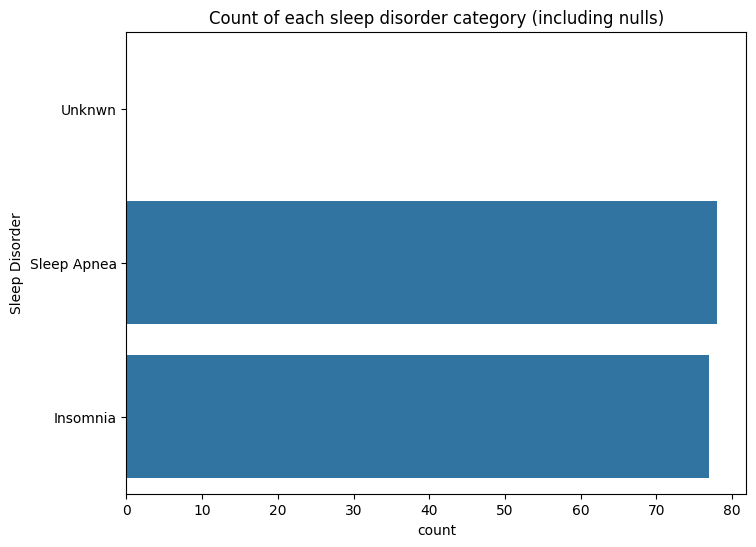

In [92]:
#checkin the count of sleep disorder category which is more
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
sns.countplot(y='Sleep Disorder', data=data, order=data['Sleep Disorder'].fillna('Unknwn').value_counts().index)
plt.title('Count of each sleep disorder category (including nulls)')
plt.show()

## We shall move on keeping nulls as unknwn for further exploratory data analysis and see what this data brings to us.

/tmp/ipython-input-658782581.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Sleep Duration'], bins=20, kde=True, palette='Set2')


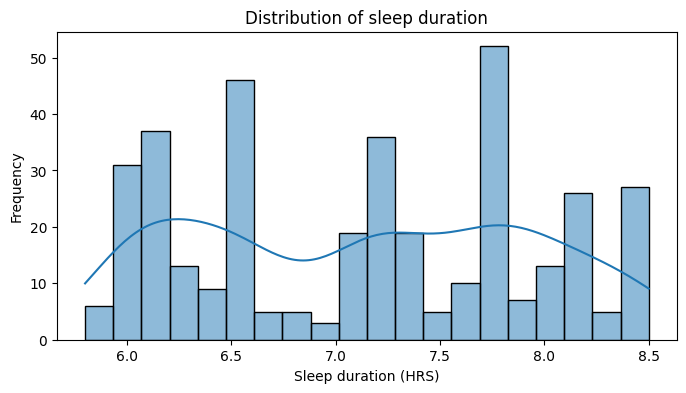

In [43]:
#Checking how many hours people are sleeping
plt.figure(figsize=(8,4))
sns.histplot(data['Sleep Duration'], bins=20, kde=True, palette='Set2')
plt.title('Distribution of sleep duration')
plt.xlabel('Sleep duration (HRS)')
plt.ylabel('Frequency')
plt.show()

### We can see that frequency is larger of people getting sleep between hour range 6.5 upto 7.5 hours which is good, significantly not a sleep deprived. However we do have some population sleeping less than 6.5 hours.

In [30]:
#data = data['Sleep Disorder'].fillna('Unknwn')

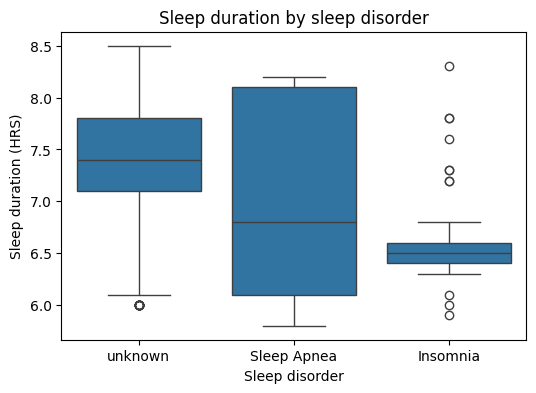

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Sleep Disorder'].fillna('unknown'), y=data['Sleep Duration'], data=data)
plt.title('Sleep duration by sleep disorder')
plt.xlabel('Sleep disorder')
plt.ylabel('Sleep duration (HRS)')
plt.show()

### So here we can see unknown category has a median of more than 7 hours which is good less likely of sleep deprived, people with sleep apnea disorder has a wide range of distribution but notable portion sleeps less than 7 hours.People with insomnia the median sleep duration is lower around 6.5 hours, with several outliers sleeping more than 7 hours and some sleeping less than 6 hours.

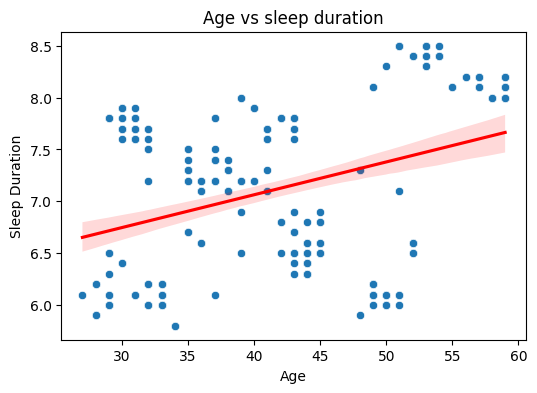

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Sleep Duration', data=data)
sns.regplot(x='Age', y='Sleep Duration',data=data, scatter=False, color='red')
plt.title('Age vs sleep duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()

### In the above plot we can see the line of regression ie the line of best fit has a positive slope which implies the trend going upwards as the age increases the sleep duration tend to increase as well. But evidently we can see there is a significant amount of population falling short for the recommended 7-9 hours of sleep. There are also older people age 45 above are sleeping less than 7 hour mark.

In [33]:
#Correlating the relationship between age and sleep duration
correlation = data['Age'].corr(data['Sleep Duration'])
print("Correlation between age and sleep duration", correlation);

Correlation between age and sleep duration 0.34470935816474396


This helps confirm the trend observed visually in the scatter plot, the correlation value of approximately 0.34 indicates a moderate positive linear relationship between age and sleep duration, however this means as age increases, sleep duration increase moderately but not strongly.

In [34]:
#Just taking a quick look of what columns we can work up next
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

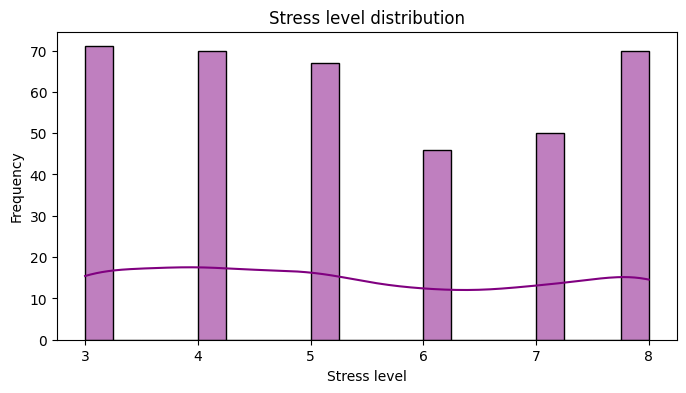

In [35]:
#Lets explore stress level distribution this helps us understand how psychological factors relate to sleep
plt.figure(figsize=(8,4))
sns.histplot(data['Stress Level'], kde=True, bins=20, color='purple')
plt.title('Stress level distribution')
plt.xlabel('Stress level')
plt.ylabel('Frequency')
plt.show()

### Our interpretation is the population shows relatively even distribution across moderate (3-5) and high (6-8) stress scores, though 3,4,5 and 8 are most commonly reported levels. lets further explore with stress level and sleep disorder.

/tmp/ipython-input-4210897504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Sleep Disorder'].fillna('Unknwn'), y=data['Stress Level'], data=data, palette='Pastel1')


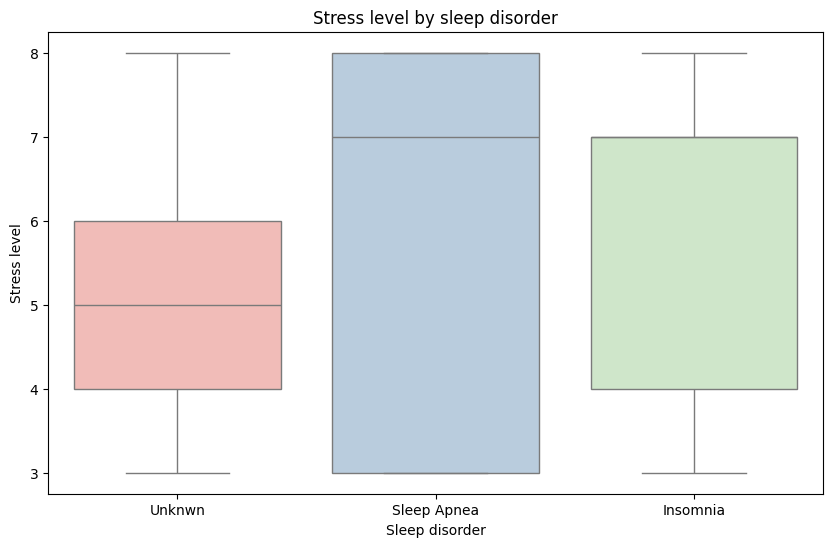

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Sleep Disorder'].fillna('Unknwn'), y=data['Stress Level'], data=data, palette='Pastel1')
plt.title('Stress level by sleep disorder')
plt.xlabel('Sleep disorder')
plt.ylabel('Stress level')
plt.show();

The boxplot shows sleep apnea has the widest range of stress levels covering both highest and lowest values in the dataset. The box is tall becuase the middle 50% data is spreadout and the median is toward the upper end of the range this means individuals with sleep apnea have both low and high stress, thought median is quite high.
Insomnia is also spread out the median is not visually distinct. The distribution is more balanced than for apnea with stress levels clustered a bit lower than apnea's median. Unknown shows tighter and lower stress level range when median is closer to the centre of distribution, which suggests people not recorded with a disorder tend to report moderate stress.

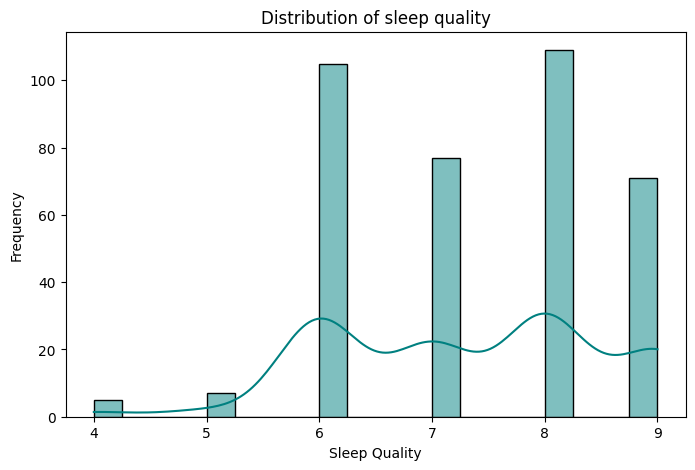

In [37]:
#lets explore distribution of sleep quality

plt.figure(figsize=(8,5))
sns.histplot(data['Quality of Sleep'], bins=20, kde=True, color='Teal')
plt.title('Distribution of sleep quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Frequency')
plt.show()

Most people report good sleep quality: The highest bars are at 6, 7, 8, and 9, showing that the majority of individuals in the dataset report sleep quality at the higher end of the scale.

/tmp/ipython-input-2545379683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Sleep Disorder'].fillna('Unknwn'), y=data['Quality of Sleep'], data=data, palette='Set3')


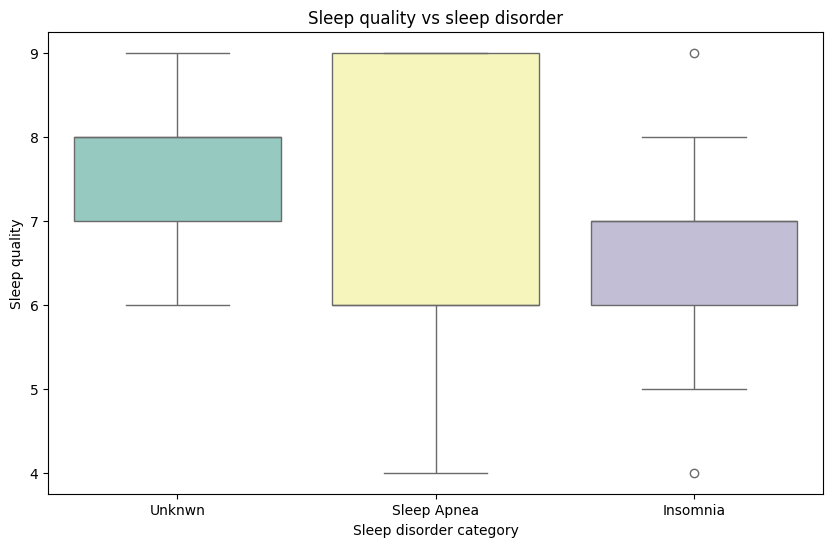

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Sleep Disorder'].fillna('Unknwn'), y=data['Quality of Sleep'], data=data, palette='Set3')
plt.title('Sleep quality vs sleep disorder')
plt.xlabel('Sleep disorder category')
plt.ylabel('Sleep quality')
plt.show()

Those with insomnia generally fare worst in sleep quality.

People with sleep apnea can have both great and very poor sleep quality, showing broad variability.

Those with unknown disorder status report the highest overall sleep quality.

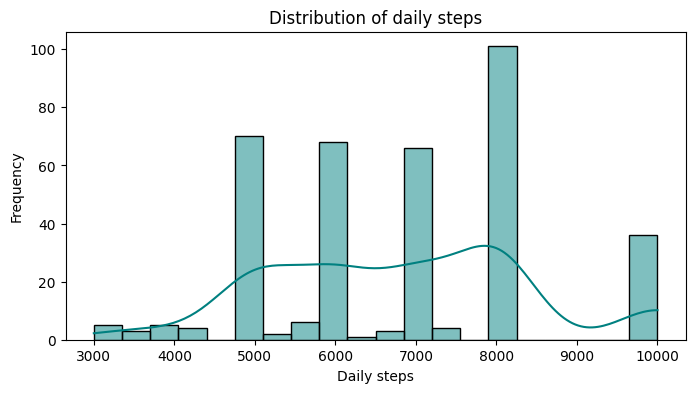

In [39]:
plt.figure(figsize=(8,4))
sns.histplot(data['Daily Steps'], bins=20, kde=True, color="Teal")
plt.title('Distribution of daily steps')
plt.xlabel('Daily steps')
plt.ylabel('Frequency')
plt.show()

Most people have good amount of daily steps between 5000 and 8000 some people also have 10000 steps which is good. The distribution is visually seen to be peaking after 5k steps and the frequency is high for 8k steps which is quit high.

/tmp/ipython-input-1736167539.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Sleep Disorder'].fillna("unknwn"), y=data['Daily Steps'], data=data, palette='Set2')


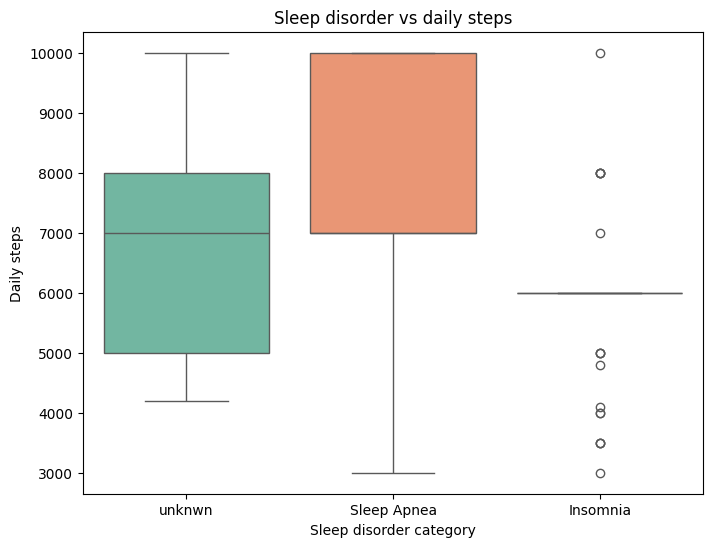

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Sleep Disorder'].fillna("unknwn"), y=data['Daily Steps'], data=data, palette='Set2')
plt.title('Sleep disorder vs daily steps')
plt.xlabel('Sleep disorder category')
plt.ylabel('Daily steps')
plt.show()

Unknown: Median and IQR (interquartile range) are fairly high, typically between 6000 and 9000 steps. This group is moderately to highly active.

Sleep Apnea: This group has the broadest range, covering both the lowest and highest step counts (3000–10000). The median and upper quartile are as high or higher than the unknown group, which may seem surprising; it suggests that not all with sleep apnea are inactive, but there’s marked variation.

Insomnia: Median and IQR are much lower than both other groups, with most values between 4000 and 6000 steps. There are numerous outliers at higher step counts, but the majority are at the lower end. This suggests that insomnia sufferers may be less active overall.


Main takeaways:

Insomnia sufferers are generally less physically active compared to other groups.

"Unknown" and "Sleep Apnea" both show higher activity levels, though apnea group also has many at low step counts, reflecting variability.

/tmp/ipython-input-2945522297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Physical Activity Level'], palette='coolwarm')


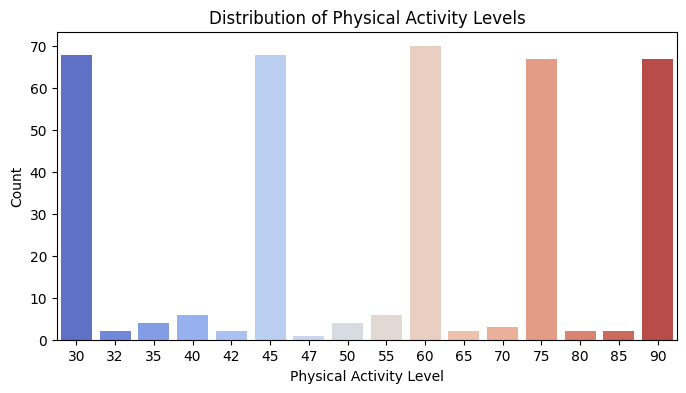

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(x=data['Physical Activity Level'], palette='coolwarm')
plt.title('Distribution of Physical Activity Levels')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.show()


Distribution of Physical Activity Levels
The physical activity variable, while numeric, only takes on a set of specific, separated values (e.g., 30, 45, 60, 75, 90). These likely represent binned or coded activity levels (like minutes of activity or scores).

The tallest bars are at the lowest (30), mid (45/60), and highest (90) levels, showing most people in the sample report one of these activity bins.

The intermediate bins (e.g., 32, 35, 42, etc.) have very few observations.

This pattern means physical activity is not continuous but represents discrete physical activity levels. That justifies using countplot/barplot since the variable is essentially categorical, not truly continuous.

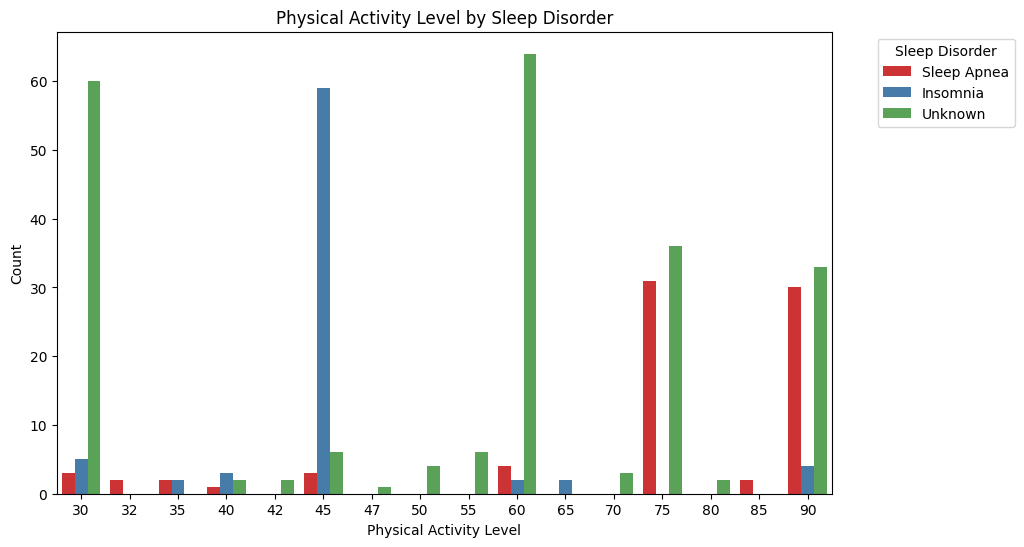

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x='Physical Activity Level', hue=data['Sleep Disorder'].fillna('Unknown'), data=data, palette='Set1')
plt.title('Physical Activity Level by Sleep Disorder')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Physical Activity by Sleep Disorder
Unknown group: Most people in this group are clustered at the extreme activity levels—30, 60, and 90—suggesting some people are either quite sedentary or very active.

Sleep Apnea & Insomnia: Both groups are far less represented, but insomnia appears slightly more at the mid to low activity bins.

Color separation by disorder helps compare the frequency of each physical activity bin in each group.

Most low activity counts belong to "Unknown", while very few insomnia and apnea cases are found at the highest physical activity levels.

# Here's what is left now for further exploration will do tomorrow

## BMI category

## Gender and occupation

In [49]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [56]:
data['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [58]:
data['BMI Category'] = data['BMI Category'].replace({'Normal Weight': 'Normal'})

/tmp/ipython-input-2491510896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BMI Category', data=data, palette='muted')


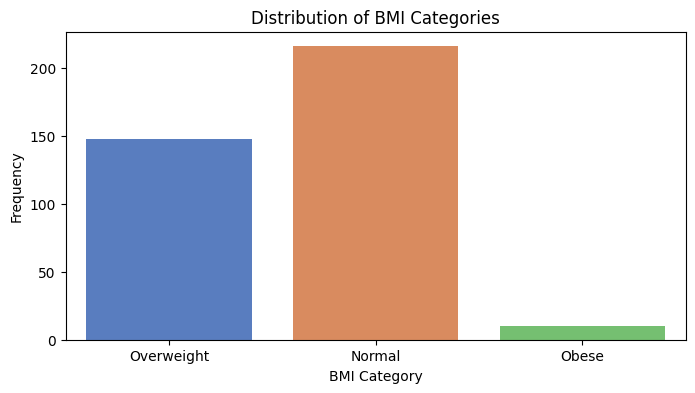

In [59]:
#Distribution of BMI categories
plt.figure(figsize=(8,4))
sns.countplot(x='BMI Category', data=data, palette='muted')
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Frequency')
plt.show()

Distribution of BMI Categories
Normal is the most frequent BMI category by a noticeable margin, followed by Overweight.

Obese category has relatively few entries compared to the other two.

This suggests the majority of the dataset’s population maintains a BMI within the normal range, with a significant group classified as overweight, and a smaller fraction as obese.

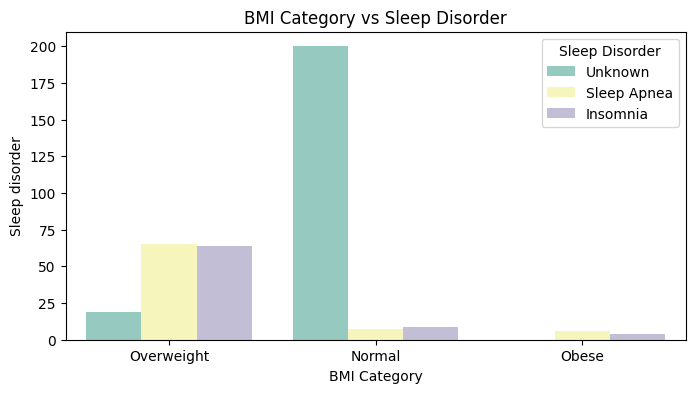

In [61]:
plt.figure(figsize=(8,4))
sns.countplot(x='BMI Category', hue=data['Sleep Disorder'].fillna('Unknown'), data=data, palette='Set3')
plt.title('BMI Category vs Sleep Disorder')
plt.xlabel('BMI Category')
plt.ylabel('Sleep disorder')
plt.show()

BMI Category vs Sleep Disorder
Normal BMI: Most individuals with normal BMI do not have a reported sleep disorder ("Unknown"), with very few reported cases of sleep apnea or insomnia.

Overweight: Both sleep apnea and insomnia occur more prominently in the overweight category compared to normal or obese. The counts for sleep disorders (sleep apnea and insomnia) in the overweight group are almost equal, highlighting that being overweight may be associated with increased risk of sleep disorders in this dataset.

Obese: Both sleep apnea and insomnia occur, but the numbers remain much lower than in the overweight group. This may indicate that although obesity is a risk factor, the sample size for obese individuals is small in this dataset.

Summary: Most sleep disorder cases (apnea and insomnia) show up in the overweight group rather than the normal or obese categories, suggesting possible patterns worth further investigation.



/tmp/ipython-input-1058566410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Set1')


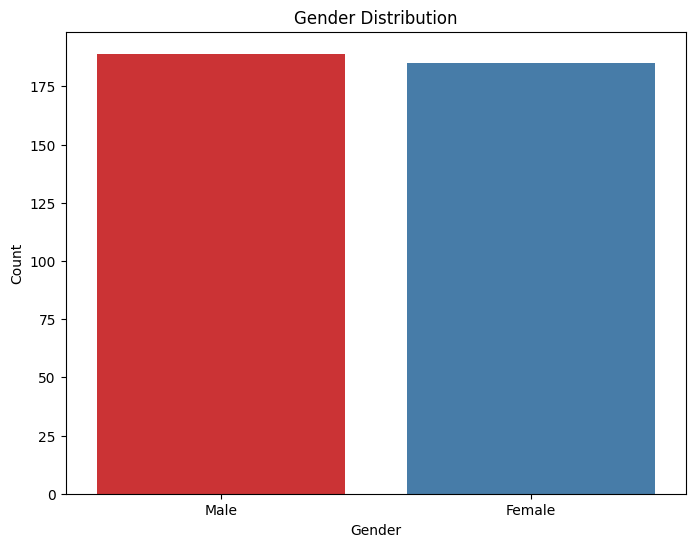

In [64]:
#Visualising gender distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=data, palette='Set1')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Gender Distribution
The dataset is fairly balanced between males and females, with just a slight excess of males. This means gender-based analyses will not be biased by unequal group sizes.

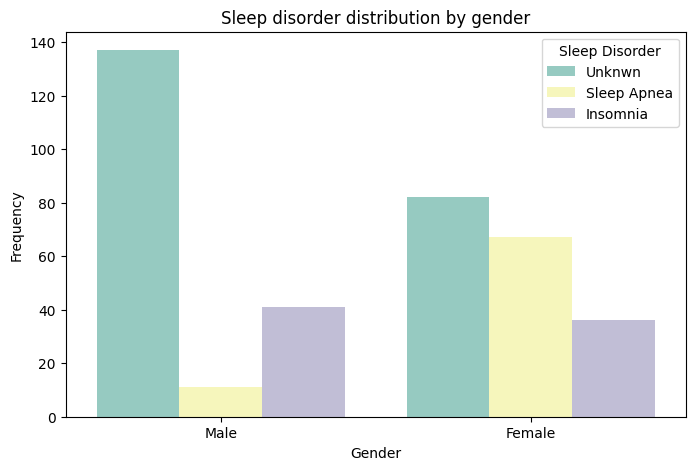

In [76]:
#Visualising gender by sleep disorder
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue=data['Sleep Disorder'].fillna('Unknwn') ,data=data, palette='Set3')
plt.title('Sleep disorder distribution by gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

Sleep Disorder Distribution by Gender
Unknown category: More males have no recorded sleep disorder than females.

Sleep Apnea: Much more common among females than males in this dataset. The difference is significant: the number of apnea cases among females is considerably higher than among males.

Insomnia: More males than females are affected by insomnia, although the difference is less extreme than the sleep apnea gender gap.

Key Takeaways:

Most males in your sample do not have a recorded sleep disorder.

Among sleep disorders, females are much more likely to have sleep apnea, while males are somewhat more likely to have insomnia.

The dataset's even gender split strengthens the reliability of these findings.

/tmp/ipython-input-2289949882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Occupation', data=data, palette='muted', order=data['Occupation'].value_counts().index)


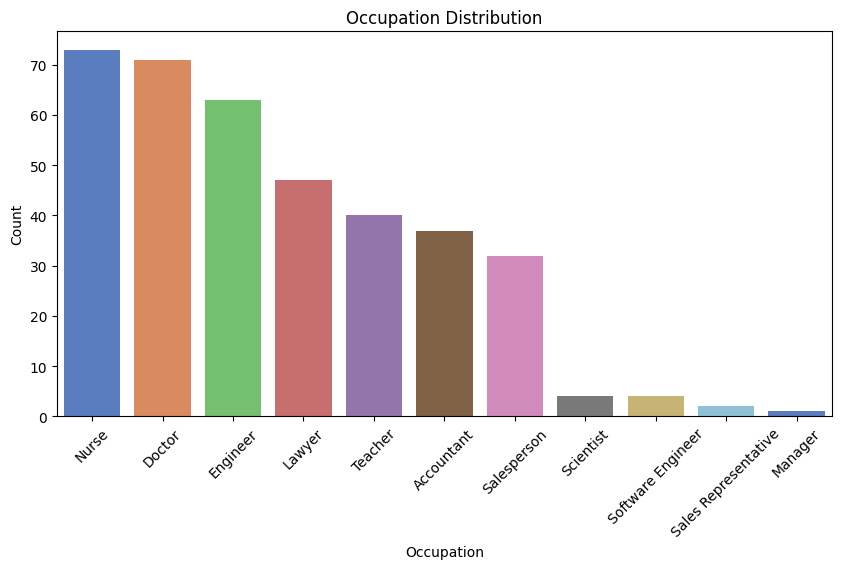

In [83]:
plt.figure(figsize=(10,5))
sns.countplot(x='Occupation', data=data, palette='muted', order=data['Occupation'].value_counts().index)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Occupation Distribution
The most common occupations in this dataset are Nurse, Doctor, and Engineer, with counts gradually decreasing through Lawyer, Teacher, Accountant, and further tailing off for Scientist, Software Engineer, Sales Representative, and Manager.

Manager is the least represented, with very few records and correspondingly few reported sleep issues.

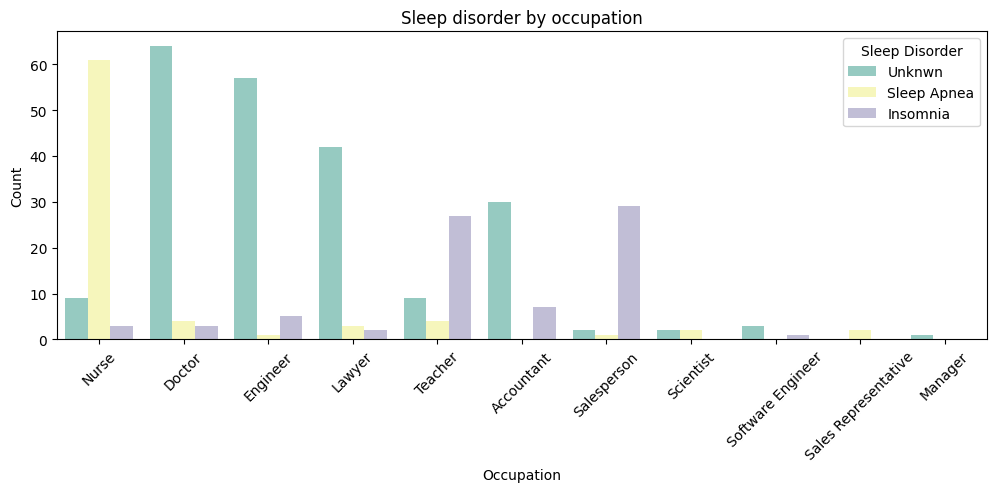

In [88]:
#sleep disorder by occupation
plt.figure(figsize=(12,4))
sns.countplot(x=data['Occupation'], hue=data['Sleep Disorder'].fillna('Unknwn'), data=data, palette='Set3', order=data['Occupation'].value_counts().index)
plt.title('Sleep disorder by occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Sleep Disorder by Occupation
Nurses have the highest number of reported sleep apnea cases by a large margin. This could suggest high occupational stress, irregular shifts, or sleep disruption common in healthcare.

Doctors and engineers have most of their data points in the "unknown" (no disorder reported) category.

Teachers and salespeople show a notably higher incidence of insomnia, which might reflect workplace stress, workload, or disruptive schedules typical in these professions.

Most other occupations have low counts of sleep disorder, possibly due to smaller sample sizes.


Key Takeaway:
Certain professions (especially Nurse for sleep apnea and Teacher/Salesperson for insomnia) appear at higher risk for sleep disorders according to your data. Managerial fatigue may go unreported due to very small sample size, so direct conclusions for managers should be made cautiously.

## Overall Summary and Conclusions

This exploratory analysis aimed to uncover patterns and associations between sleep health, lifestyle factors, and demographic variables in the given dataset. Throughout the EDA, the following key insights were identified:

- **Sleep Disorder Prevalence:** Most individuals do not report a sleep disorder, but among those who do, sleep apnea and insomnia are the most common. Sleep apnea appears disproportionately in nurse occupations, likely linked to shift work and occupational stress. Insomnia is prevalent among teachers and salespersons, suggesting work-related stress or irregular schedules may play a role.

- **BMI and Sleep Disorder:** The majority of the sample is within the normal or overweight BMI range. However, sleep disorders (both apnea and insomnia) are far more common in the overweight group compared to normal or obese categories, indicating an association between increased BMI and poor sleep outcomes.

- **Physical Activity and Daily Steps:** Activity levels are spread across the population, but individuals with insomnia tend to have lower daily step counts, suggesting that physical inactivity could be related to sleep disruption.

- **Gender Differences:** The dataset is almost evenly split between males and females. Sleep apnea is noticeably more frequent among females, while insomnia is more common among males. Most males have no reported sleep disorders.

- **Occupation Patterns:** Healthcare workers (nurses, doctors) are overrepresented. Nurses stand out as having a high prevalence of sleep apnea, supporting previous research on the impact of shift work and occupational demands on sleep quality. Teachers and salespersons exhibit higher rates of insomnia.

- **Key Overall Finding:** Occupation, BMI, physical activity, and gender all show meaningful associations with sleep health. Certain jobs with higher stress or atypical hours may carry a higher risk, and overweight individuals should be considered a risk group for sleep problems.

**Conclusion:**  
Sleep health is shaped by an interplay of lifestyle, physical, and occupational factors. The patterns seen here highlight the importance of occupational wellness programs, encouragement of physical activity, and BMI management for promoting better sleep outcomes. For targeted interventions, special consideration should be given to high-risk occupations (healthcare, education, sales) and individuals with overweight BMI. Further study with objective sleep measures and diverse occupational groups would strengthen understanding and application.
